In [ ]:
!pip install -U langgraph langchain-google-genai langchain_community ddgs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 14.7 

In [ ]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

Enter API key for Google Gemini: ··········


## Simple workflow

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
# define state
class BMIState(TypedDict):

    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [ ]:
def calculate_bmi(state):

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    bmi = round(bmi, 2)

    return {'bmi':bmi}

In [ ]:
def label_bmi(state):

    bmi = state['bmi']

    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 25:
        category = "Normal"
    elif 25 <= bmi < 30:
        category = "Overweight"
    else:
        category = "Obese"

    return {'category':category}

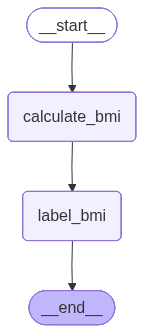

In [ ]:
# define your graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

# compile the graph
workflow = graph.compile()

workflow

In [ ]:
# execute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


## Simple llm workflow

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

genai_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-lite",
    temperature=0.5,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

genai_llm

ChatGoogleGenerativeAI(model='models/gemini-2.5-flash-lite', google_api_key=SecretStr('**********'), temperature=0.5, max_retries=2, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x79020c3c4650>, default_metadata=(), model_kwargs={})

In [ ]:
response = genai_llm.invoke('How far is moon from the earth?')
response

AIMessage(content="The Moon's distance from Earth isn't constant because its orbit is elliptical, not a perfect circle. However, we can provide an average and the range:\n\n*   **Average Distance:** The average distance between the Earth and the Moon is approximately **384,400 kilometers (238,900 miles)**.\n\n*   **Perigee (closest point):** At its closest point, the Moon is about **363,300 kilometers (225,700 miles)** away.\n\n*   **Apogee (farthest point):** At its farthest point, the Moon is about **405,500 kilometers (251,900 miles)** away.\n\nSo, while the average is a good general figure, remember that it varies throughout the month.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--816c4959-8c3c-4a24-8319-a8d1419f63e1-0', usage_metadata={'input_tokens': 9, 'output_tokens': 176, 'total_tokens': 185, 'input_token_details': {'cache_r

In [ ]:
print(response.content)

The Moon's distance from Earth isn't constant because its orbit is elliptical, not a perfect circle. However, we can provide an average and the range:

*   **Average Distance:** The average distance between the Earth and the Moon is approximately **384,400 kilometers (238,900 miles)**.

*   **Perigee (closest point):** At its closest point, the Moon is about **363,300 kilometers (225,700 miles)** away.

*   **Apogee (farthest point):** At its farthest point, the Moon is about **405,500 kilometers (251,900 miles)** away.

So, while the average is a good general figure, remember that it varies throughout the month.


In [ ]:
class LLMState(TypedDict):
    question: str
    answer: str

In [ ]:
def llm_qa(state):

    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    answer = genai_llm.invoke(prompt).content

    return {'answer':answer}

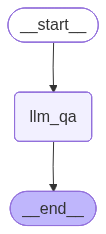

In [ ]:
# create our graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa', llm_qa)

# add edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()

workflow

In [ ]:
intial_state = {'question': 'How far is moon from the earth?'}

final_state = workflow.invoke(intial_state)

final_state

{'question': 'How far is moon from the earth?',
 'answer': "The average distance between the Earth and the Moon is approximately **384,400 kilometers (238,900 miles)**.\n\nIt's important to note that this is an average because the Moon's orbit around the Earth is not a perfect circle, but rather an ellipse. This means the distance varies:\n\n*   **Perigee:** The closest point in the Moon's orbit to Earth, about 363,300 km (225,700 miles).\n*   **Apogee:** The farthest point in the Moon's orbit from Earth, about 405,500 km (251,900 miles)."}

In [ ]:
print(final_state['answer'])

The average distance between the Earth and the Moon is approximately **384,400 kilometers (238,900 miles)**.

It's important to note that this is an average because the Moon's orbit around the Earth is not a perfect circle, but rather an ellipse. This means the distance varies:

*   **Perigee:** The closest point in the Moon's orbit to Earth, about 363,300 km (225,700 miles).
*   **Apogee:** The farthest point in the Moon's orbit from Earth, about 405,500 km (251,900 miles).


In [ ]:
intial_state = {'question': 'what was my first question?'}

final_state = workflow.invoke(intial_state)

final_state

{'question': 'what was my first question?',
 'answer': 'I cannot answer that question. As a large language model, I do not have memory of past conversations. Each interaction is treated as a new one, and I do not retain any information about what you have asked me before.'}

## workflow chain

In [ ]:
topic = 'education'

response1 = genai_llm.invoke(f'Generate one liner motivational quote on topic - {topic}?')
print(response1.content)

Education is the key that unlocks the door to your potential.


In [ ]:
response2 = genai_llm.invoke(f'Convert this quote to hindi. Give me one liner response - {response1.content}?')
print(response2.content)

शिक्षा वह चाबी है जो आपकी क्षमता के द्वार खोलती है।


In [ ]:
class QuoteState(TypedDict):
    topic: str
    english_quote: str
    hindi_quote: str

In [ ]:
def create_english_quote(state):
    # fetch title
    topic = state['topic']

    # call llm gen outline
    prompt = f'Generate one liner motivational quote on topic - {topic}?'
    english_quote = genai_llm.invoke(prompt).content

    return {'english_quote':english_quote}

In [ ]:
def create_hindi_quote(state):
    english_quote = state['english_quote']

    prompt = f'Convert this quote to hindi. Give me one liner response - {english_quote}?'

    hindi_quote = genai_llm.invoke(prompt).content

    return {'hindi_quote':hindi_quote}

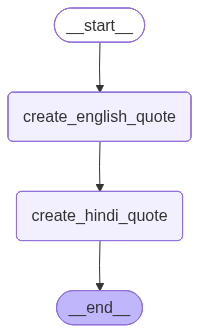

In [ ]:
graph = StateGraph(QuoteState)

# nodes
graph.add_node('create_english_quote', create_english_quote)
graph.add_node('create_hindi_quote', create_hindi_quote)

# edges
graph.add_edge(START, 'create_english_quote')
graph.add_edge('create_english_quote', 'create_hindi_quote')
graph.add_edge('create_hindi_quote', END)

workflow = graph.compile()
workflow

In [ ]:
intial_state = {'topic': 'sports'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'topic': 'sports', 'english_quote': 'Sweat is just fat crying.', 'hindi_quote': 'पसीना बस चर्बी के रोने जैसा है।'}


## Parallel workflow

In [ ]:
topic = 'education'

response1 = genai_llm.invoke(f'Generate one para content on topic - {topic}?')
response1.content

'Education is a transformative force, empowering individuals with knowledge, critical thinking skills, and the ability to navigate an increasingly complex world. It opens doors to opportunity, fostering personal growth and enabling people to contribute meaningfully to society. Beyond the acquisition of facts, education cultivates curiosity, creativity, and a lifelong love of learning, shaping not just careers but also well-rounded, engaged citizens who can adapt, innovate, and drive positive change.'

In [ ]:
response2 = genai_llm.invoke(f'Generate one liner motivational quote on topic - {topic}?')
print(response2.content)

**Education is the key that unlocks your boundless potential.**


In [ ]:
response3 = genai_llm.invoke(f'Add the motivational quote - {response2.content} to this para - {response1.content}?')
response3.content

"Here's the paragraph with the motivational quote integrated:\n\nEducation is a transformative force, empowering individuals with knowledge, critical thinking skills, and the ability to navigate an increasingly complex world. **Education is the key that unlocks your boundless potential.** It opens doors to opportunity, fostering personal growth and enabling people to contribute meaningfully to society. Beyond the acquisition of facts, education cultivates curiosity, creativity, and a lifelong love of learning, shaping not just careers but also well-rounded, engaged citizens who can adapt, innovate, and drive positive change."

In [ ]:
class SpeechState(TypedDict):
    topic: str
    quote: str
    speech: str
    speech_with_quote: str

In [ ]:
def create_speech(state):
    # fetch title
    topic = state['topic']

    response = genai_llm.invoke(f'Generate one para content on topic - {topic}?')

    return {'speech':response.content}

def create_quote(state):
    # fetch title
    topic = state['topic']

    response = genai_llm.invoke(f'Generate one liner motivational quote on topic - {topic}?')

    return {'quote':response.content}

def rewrite_speech(state):
    # fetch title
    quote = state['quote']
    speech = state['speech']

    response = genai_llm.invoke(f'Add the motivational quote - {quote} to this para - {speech}?')

    return {'speech_with_quote':response.content}

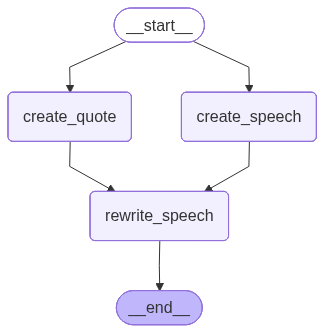

In [ ]:
graph = StateGraph(SpeechState)

# nodes
graph.add_node('create_quote', create_quote)
graph.add_node('create_speech', create_speech)
graph.add_node('rewrite_speech', rewrite_speech)

# edges
graph.add_edge(START, 'create_quote')
graph.add_edge(START, 'create_speech')

graph.add_edge('create_quote', 'rewrite_speech')
graph.add_edge('create_speech', 'rewrite_speech')

graph.add_edge('rewrite_speech', END)

workflow = graph.compile()
workflow

In [ ]:
intial_state = {'topic': 'sports'}

final_state = workflow.invoke(intial_state)

final_state

{'topic': 'sports',
 'quote': 'Sweat today, shine tomorrow.',
 'speech': "Sports are a vibrant tapestry woven with threads of competition, teamwork, and individual prowess, offering a universal language that transcends borders and cultures. From the electrifying roar of a stadium crowd to the quiet determination of an athlete pushing their limits, sports ignite passion and inspire millions. They teach invaluable lessons about discipline, resilience, and the pursuit of excellence, fostering both physical health and mental fortitude. Whether it's the strategic ballet of a soccer match, the explosive power of a sprint, or the intricate coordination of a gymnastics routine, sports provide a captivating spectacle that entertains, unites, and continually pushes the boundaries of human potential.",
 'speech_with_quote': "Sports are a vibrant tapestry woven with threads of competition, teamwork, and individual prowess, offering a universal language that transcends borders and cultures. From th

In [ ]:
print(final_state['speech_with_quote'])

Sports are a vibrant tapestry woven with threads of competition, teamwork, and individual prowess, offering a universal language that transcends borders and cultures. From the electrifying roar of a stadium crowd to the quiet determination of an athlete pushing their limits, sports ignite passion and inspire millions. They teach invaluable lessons about discipline, resilience, and the pursuit of excellence, fostering both physical health and mental fortitude. Whether it's the strategic ballet of a soccer match, the explosive power of a sprint, or the intricate coordination of a gymnastics routine, sports provide a captivating spectacle that entertains, unites, and continually pushes the boundaries of human potential. **Sweat today, shine tomorrow.**


## conditional edge

In [ ]:
class QuadState(TypedDict):

    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [ ]:
from typing import Literal

def show_equation(state):

    equation = f'{state["a"]}x^2+{state["b"]}x+{state["c"]}'

    return {'equation':equation}

def calculate_discriminant(state):

    discriminant = state["b"]**2 - (4*state["a"]*state["c"])

    return {'discriminant': discriminant}

def real_roots(state):

    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

def repeated_roots(state):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}

def no_real_roots(state):

    result = f'No real roots'

    return {'result': result}

def check_condition(state) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

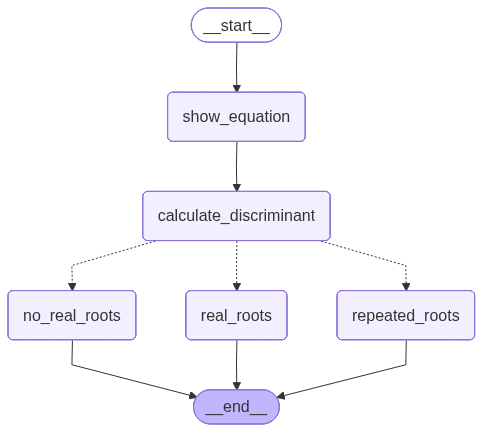

In [ ]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()
workflow

In [ ]:
initial_state = {
    'a': 2,
    'b': 4,
    'c': 2
}

result = workflow.invoke(initial_state)
result

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x^2+4x+2',
 'discriminant': 0,
 'result': 'Only repeating root is -1.0'}

In [ ]:
initial_state = {
    'a': 1,
    'b': 5,
    'c': 6
}

result = workflow.invoke(initial_state)
result

{'a': 1,
 'b': 5,
 'c': 6,
 'equation': '1x^2+5x+6',
 'discriminant': 1,
 'result': 'The roots are -2.0 and -3.0'}

In [ ]:
initial_state = {
    'a': 1,
    'b': 2,
    'c': 5
}

result = workflow.invoke(initial_state)
result

{'a': 1,
 'b': 2,
 'c': 5,
 'equation': '1x^2+2x+5',
 'discriminant': -16,
 'result': 'No real roots'}

## Loop

In [ ]:
topic = 'education'

response1 = genai_llm.invoke(f'Generate one para article on topic - {topic}?')
response1.content

'Education is the cornerstone of personal growth and societal advancement, a transformative journey that unlocks potential and broadens horizons. It encompasses not just the acquisition of knowledge and skills, but also the cultivation of critical thinking, creativity, and ethical values. Through education, individuals are empowered to understand the world around them, make informed decisions, and contribute meaningfully to their communities. It serves as a powerful equalizer, offering opportunities for upward mobility and breaking down barriers of circumstance, ultimately shaping a more informed, innovative, and just future for all.'

In [ ]:
response2 = genai_llm.invoke(f'Summarize this article into one liner - {response1.content}?')
response2.content

'Education is the transformative force that unlocks individual potential and drives societal progress by fostering knowledge, critical thinking, and ethical values for a more informed and just future.'

In [ ]:
from pydantic import BaseModel, Field

class SummaryEvaluation(BaseModel):
    evaluation: Literal["approved", "needs_improvement"] = Field(..., description="article evaluation.")
    feedback: str = Field(..., description="feedback for the article.")

genai_llm_evaluator = genai_llm.with_structured_output(SummaryEvaluation)
response = genai_llm_evaluator.invoke(f'Review this article for twitter:\n{response2.content}?')
response

SummaryEvaluation(evaluation='approved', feedback='This is a great tweet! It')

In [ ]:
response.model_dump()

{'evaluation': 'approved', 'feedback': 'This is a great tweet! It'}

In [ ]:
from pydantic import BaseModel, Field
from typing import Annotated
import operator

class PostWriter(TypedDict):
    topic: str
    platform: str
    article: str
    summary: str
    current_count: int
    max_count: int
    evaluation: str
    feedback: str

    # summary_history: Annotated[list[str], operator.add]
    # feedback_history: Annotated[list[str], operator.add]

class SummaryEvaluation(BaseModel):
    evaluation: Literal["approved", "needs_improvement"] = Field(..., description="article evaluation.")
    feedback: str = Field(..., description="feedback for the article.")

In [ ]:
def article_writer(state):
    topic = state['topic']

    response = genai_llm.invoke(f'Generate one para article on topic - {topic}?')

    return {'article':response.content}

def summary_writer(state):
    article = state['article']
    if 'feedback' in state:
        prompt = f'Summarize this article based on feedback:\nArticle:{article}\nFaadback:{state["feedback"]}'
    else:
        prompt = f'Summarize this article into one liner - {article}?'

    response = genai_llm.invoke(prompt)

    # return {'summary':response.content, 'summary_history':[response.content]}

    return {'summary':response.content}

def summary_feedback(state):
    summary = state['summary']
    platform = state['platform']
    current_count = state['current_count']

    genai_llm_evaluator = genai_llm.with_structured_output(SummaryEvaluation)

    instructions = (
        "Add emoji's, make it attractive, keep it short, ensure proper grammar, "
        "use engaging language, and make sure the article is written in Hindi"
    )

    prompt = f"""
    Review this article for Platform - {platform} based on the instructions provided.

    Instructions: {instructions}

    - Check if ALL instructions are followed.
    - If ANY instruction is not met, do NOT approve the article.
    - Provide proper feedback on what is missing or needs improvement.
    - Only approve if every instruction is satisfied.

    Article: {summary}
    """

    response = genai_llm_evaluator.invoke(prompt)
    response_dict = response.model_dump()

    current_count += 1

    # return {'evaluation':response_dict['evaluation'], 'feedback':response_dict['feedback'],
    #         'current_count':current_count, 'feedback_history':[response_dict['feedback']]}

    return {'evaluation':response_dict['evaluation'], 'feedback':response_dict['feedback'],
            'current_count':current_count}


def route_evaluation(state):
    if state['evaluation'] == 'approved' or state['current_count'] >= state['max_count']:
        return 'approved'
    else:
        return 'needs_improvement'

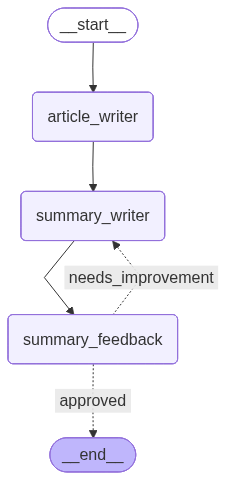

In [ ]:
graph = StateGraph(PostWriter)

graph.add_node('article_writer', article_writer)
graph.add_node('summary_writer', summary_writer)
graph.add_node('summary_feedback', summary_feedback)

graph.add_edge(START, 'article_writer')
graph.add_edge('article_writer', 'summary_writer')
graph.add_edge('summary_writer', 'summary_feedback')

graph.add_conditional_edges('summary_feedback', route_evaluation, {'approved': END, 'needs_improvement': 'summary_writer'})

workflow = graph.compile()

workflow

In [ ]:
initial_state = {
    "topic": "cricket",
    "platform": "twitter",
    "current_count": 0,
    "max_count": 3
}
result = workflow.invoke(initial_state)
result

{'topic': 'cricket',
 'platform': 'twitter',
 'article': "Cricket, a sport steeped in tradition and global appeal, captivates millions with its blend of strategic thinking, athletic prowess, and dramatic narratives. From the iconic Ashes rivalry to the electrifying atmosphere of the T20 World Cup, the game unfolds across diverse formats, each offering a unique challenge and spectacle. Whether it's the patient build-up of a Test match, the explosive hitting of a one-day international, or the fast-paced action of T20, cricket provides a platform for individual brilliance and collective teamwork, fostering passionate fan bases and a rich sporting culture that continues to evolve and inspire.",
 'summary': 'ज़रूर, यहाँ आपके फीडबैक के अनुसार लेख का सारांश दिया गया है:\n\nक्रिकेट 🏏, जो परंपरा और वैश्विक आकर्षण से भरपूर खेल है, अपनी रणनीतिक सोच, एथलेटिक क्षमता और रोमांचक कहानियों के मिश्रण से लाखों लोगों को मंत्रमुग्ध कर देता है। प्रतिष्ठित एशेज प्रतिद्वंद्विता से लेकर T20 विश्व कप के बिजली प

In [ ]:
print(result['summary'])

ज़रूर, यहाँ आपके फीडबैक के अनुसार लेख का सारांश दिया गया है:

क्रिकेट 🏏, जो परंपरा और वैश्विक आकर्षण से भरपूर खेल है, अपनी रणनीतिक सोच, एथलेटिक क्षमता और रोमांचक कहानियों के मिश्रण से लाखों लोगों को मंत्रमुग्ध कर देता है। प्रतिष्ठित एशेज प्रतिद्वंद्विता से लेकर T20 विश्व कप के बिजली पैदा करने वाले माहौल तक, खेल विभिन्न प्रारूपों में unfolds होता है, हर एक अनूठी चुनौती और तमाशा पेश करता है। चाहे वह टेस्ट मैच का धैर्यवान निर्माण हो, एक दिवसीय अंतर्राष्ट्रीय की विस्फोटक हिटिंग हो, या T20 की तेज-तर्रार कार्रवाई हो, क्रिकेट व्यक्तिगत प्रतिभा और सामूहिक टीम वर्क के लिए एक मंच प्रदान करता है, जो भावुक प्रशंसक आधार और एक समृद्ध खेल संस्कृति को बढ़ावा देता है जो विकसित और प्रेरित करती रहती है। ✨


In [ ]:
# for summary,feedback in zip(result['summary_history'],result['feedback_history']):
#     print(f" Summary: {summary}")
#     print(f" Feedback: {feedback}")
#     print('=='*30)

## Tools

In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun(region="us-en")
search_tool

DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))

In [ ]:
search_tool.invoke("Cricket Asia cup 2025 Ind vs Pak result?")

'Hello, goodevening and welcome to CricketCountry’s live coverage of the Asia Cup 2025 match between India and Pakistan. You might not know it but the tickets for the upcoming India vs Pakistan group A clash in the Asia Cup 2025 are still not sold out , which is because ... India ( IND ) vs Pakistan ( PAK ) Asia Cup 2025 Match Date, Time, Live Cricket Streaming, Playing 11 Prediction: The Indian team starts the game as heavy ... Now Reading: Ind vs Pak Asia Cup 2025 ... Ind vs Pak Asia Cup 2025 T20 Preview: Amid subdued build-up, India and Pakistan hope to deliver a classic ... Cricket Stadium Pitch Report: India vs Pakistan Asia Cup 2025 ... Dubai International Cricket Stadium Pitch Report: India vs Pakistan Asia Cup 2025'

In [ ]:
response = genai_llm.invoke(f'Who won cricket asia cup 2025 ind vs pak match?')
response.content

'The Asia Cup 2025 has not happened yet. Therefore, there has been no India vs. Pakistan match in that tournament, and no one has won it.'

In [ ]:
# Make tool list
tools = [search_tool]

# Make the LLM tool-aware
genai_llm_with_tool = genai_llm.bind_tools(tools)
response = genai_llm_with_tool.invoke(f'Who won cricket asia cup 2025 ind vs pak match?')
response.content

''

In [ ]:
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'duckduckgo_search', 'arguments': '{"query": "cricket asia cup 2025 ind vs pak match winner"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--f4b36b48-f249-42b5-8cab-e0ae06d88fa0-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'cricket asia cup 2025 ind vs pak match winner'}, 'id': 'c3f21a15-59d4-43c0-b881-c69941af2555', 'type': 'tool_call'}], usage_metadata={'input_tokens': 81, 'output_tokens': 30, 'total_tokens': 111, 'input_token_details': {'cache_read': 0}})

In [ ]:
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [ ]:
def chat_node(state):
    messages = state['messages']
    response = genai_llm_with_tool.invoke(messages)
    return {"messages": [response]}

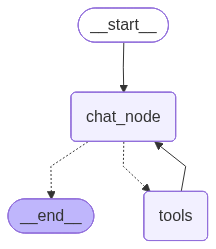

In [ ]:
tool_node = ToolNode(tools)

# graph structure
graph = StateGraph(ChatState)
graph.add_node("chat_node", chat_node)
graph.add_node("tools", tool_node)

graph.add_edge(START, "chat_node")

# If the LLM asked for a tool, go to ToolNode; else finish
graph.add_conditional_edges("chat_node", tools_condition)

graph.add_edge("tools", "chat_node")

tool_workflow = graph.compile()
tool_workflow

In [ ]:
initial_state = {}
initial_state['messages'] = [HumanMessage(content="who won ind vs pak match in asia cup 2025?")]
result = tool_workflow.invoke(initial_state)
result

{'messages': [HumanMessage(content='who won ind vs pak match in asia cup 2025?', additional_kwargs={}, response_metadata={}, id='701c1f19-b4a3-4114-9cc6-8310d4ae3572'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'duckduckgo_search', 'arguments': '{"query": "ind vs pak asia cup 2025 winner"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--40e82eb0-f4cf-4cd3-993d-306fca6e438d-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'ind vs pak asia cup 2025 winner'}, 'id': '325f7dce-343e-4881-bbda-e9c54ef2ddaf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 81, 'output_tokens': 27, 'total_tokens': 108, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='14 hours ago - Pakistan won the toss and elected to bat. Oman won the toss and elected to field. Aryan Bisht (Oma) made his T20I debut. It was the 100

In [ ]:
result["messages"][-1].content

'India won the match against Pakistan in the Asia Cup 2025. They won by 7 wickets with 25 balls remaining.'

## Memory

In [ ]:
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [ ]:
def chat_node(state):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = genai_llm.invoke(messages)

    # response store state
    return {'messages': [response]}

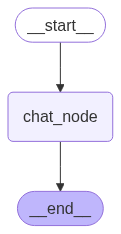

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver
checkpointer = InMemorySaver()

# create our graph
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# compile
# workflow = graph.compile()
memory_workflow = graph.compile(checkpointer=checkpointer)

memory_workflow

In [ ]:
config1 = {"configurable": {"thread_id": "1111"}}
initial_state = {
    'messages': [HumanMessage(content='What is the capital of india?')]
}

final_state = memory_workflow.invoke(initial_state, config = config1)
final_state

{'messages': [HumanMessage(content='What is the capital of india?', additional_kwargs={}, response_metadata={}, id='14781e4a-75a5-419a-9eab-5d1ad864325d'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--693bfc9d-a188-4e45-a56b-9de4903d9aa2-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
final_state['messages'][-1].content

'The capital of India is **New Delhi**.'

In [ ]:
initial_state = {
    'messages': [HumanMessage(content='What was my first question?')]
}

final_state = memory_workflow.invoke(initial_state, config = config1)
final_state

{'messages': [HumanMessage(content='What is the capital of india?', additional_kwargs={}, response_metadata={}, id='14781e4a-75a5-419a-9eab-5d1ad864325d'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--693bfc9d-a188-4e45-a56b-9de4903d9aa2-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='What was my first question?', additional_kwargs={}, response_metadata={}, id='90f3b6b9-883d-4989-b1b3-20770cfd47f7'),
  AIMessage(content='Your first question was: "What is the capital of India?"', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--c7

In [ ]:
final_state['messages'][-1].content

'Your first question was: "What is the capital of India?"'

In [ ]:
config1 = {"configurable": {"thread_id": "101010"}}
initial_state = {
    'messages': [HumanMessage(content='What is the capital of france?')]
}

final_state = memory_workflow.invoke(initial_state, config = config1)
final_state

{'messages': [HumanMessage(content='What is the capital of france?', additional_kwargs={}, response_metadata={}, id='71032d7b-1da6-4269-86b7-95542ed13816'),
  AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--fa9384f3-0d4a-4b55-bdc2-0f837b95f0e0-0', usage_metadata={'input_tokens': 8, 'output_tokens': 8, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
final_state['messages'][-1].content

'The capital of France is **Paris**.'

In [ ]:
initial_state = {
    'messages': [HumanMessage(content='What was my first question?')]
}

final_state = memory_workflow.invoke(initial_state, config = config1)
final_state

{'messages': [HumanMessage(content='What is the capital of france?', additional_kwargs={}, response_metadata={}, id='71032d7b-1da6-4269-86b7-95542ed13816'),
  AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--fa9384f3-0d4a-4b55-bdc2-0f837b95f0e0-0', usage_metadata={'input_tokens': 8, 'output_tokens': 8, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='What was my first question?', additional_kwargs={}, response_metadata={}, id='cfc23cd2-54b7-4f60-ab64-cb65b59f4ac8'),
  AIMessage(content='Your first question was: "What is the capital of france?"', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--246

In [ ]:
final_state['messages'][-1].content

'Your first question was: "What is the capital of france?"'

## Chatbot

In [ ]:
thred_id = input("Enter thread id: ")
config1 = {"configurable": {"thread_id": thred_id}}
config1

Enter thread id: 123456


{'configurable': {'thread_id': '123456'}}

In [ ]:
while True:
    user_query = input("Ask your query: ")

    if user_query == 'exit':
        break

    initial_state = {'messages': [HumanMessage(content=user_query)]}
    final_state = memory_workflow.invoke(initial_state, config = config1)
    print(f"Bot: {final_state['messages'][-1].content}")

Ask your query: hi
Bot: Hi there! How can I help you today?
Ask your query: my name is nakul i was born on 1 september 2000
Bot: Nice to meet you, Nakul! Thanks for sharing your birthday. That makes you a Virgo, born right at the cusp of summer and autumn.

Is there anything specific you'd like to know or talk about related to your birthday or anything else?
Ask your query: what is my age if todays date is 18 sep 2025
Bot: Let's figure that out!

*   **Your Birthdate:** September 1, 2000
*   **Today's Date:** September 18, 2025

You've completed 25 full years. Since your birthday in 2025 (September 1st) has already passed by September 18th, you are **25 years old**.
Ask your query: exit
